In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")

In [11]:
data_path = 'E:\\cutomer_proj\\customer_shopping_behavior.csv'

df = pd.read_csv(data_path)

In [13]:
print("Shape:", df.shape)
df.head()

Shape: (3900, 18)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [17]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.isna().sum().sort_values(ascending=False)

Review Rating             37
Customer ID                0
Age                        0
Payment Method             0
Previous Purchases         0
Promo Code Used            0
Discount Applied           0
Shipping Type              0
Subscription Status        0
Season                     0
Color                      0
Size                       0
Location                   0
Purchase Amount (USD)      0
Category                   0
Item Purchased             0
Gender                     0
Frequency of Purchases     0
dtype: int64

In [21]:
df.columns = df.columns.str.strip()

In [23]:
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [25]:
if 'Review Rating' in df.columns:
    df['Review Rating'] = df['Review Rating'].fillna(df['Review Rating'].median())

In [27]:
yes_no_cols = ['Discount Applied', 'Promo Code Used', 'Subscription Status']

for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.title()

In [29]:
# Map to numeric flags where useful
df['DiscountFlag'] = df.get('Discount Applied', 'No').map({'Yes': 1, 'No': 0})
df['PromoFlag'] = df.get('Promo Code Used', 'No').map({'Yes': 1, 'No': 0})

In [31]:
# Repeat customer flag
if 'Previous Purchases' in df.columns:
    df['IsRepeat'] = (df['Previous Purchases'] > 0).astype(int)
else:
    df['IsRepeat'] = 0

In [33]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,DiscountFlag,PromoFlag,IsRepeat
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,1,1,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,1,1,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,1,1,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,1,1,1


In [35]:
freq_map = {
    'Daily': 30,
    'Weekly': 4,
    'Fortnightly': 2,
    'Monthly': 1,
    'Quarterly': 0.33,
    'Annually': 0.08
}

In [37]:
if 'Frequency of Purchases' in df.columns:
    df['Frequency of Purchases'] = df['Frequency of Purchases'].str.strip().str.title()
    df['FreqPerMonth'] = df['Frequency of Purchases'].map(freq_map)
else:
    df['FreqPerMonth'] = np.nan

In [39]:
# Just to be safe, fill any remaining NaN in numeric features with 0 for now
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

In [41]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,DiscountFlag,PromoFlag,IsRepeat,FreqPerMonth
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,1,1,1,2.00
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,1,1,1,2.00
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1,1,1,4.00
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,1,1,1,4.00
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,1,1,1,0.08


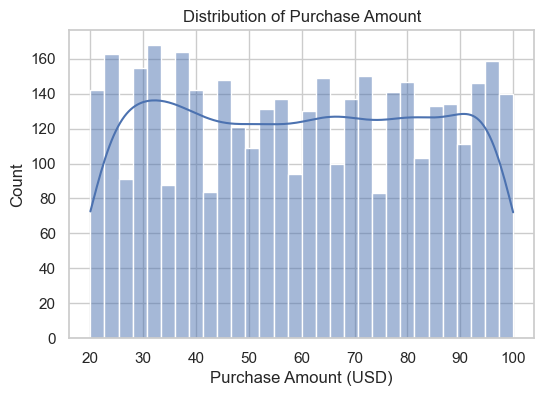

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount (USD)")
plt.show()

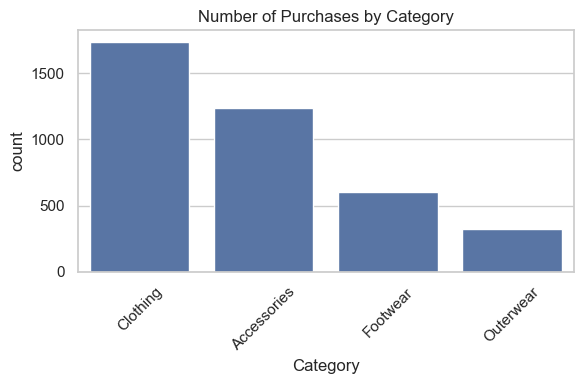

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title("Number of Purchases by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

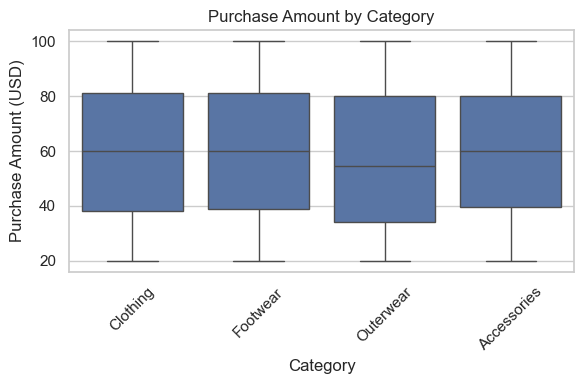

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.title("Purchase Amount by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
group_cols = ['Customer ID']
agg_dict = {
    'Purchase Amount (USD)': ['sum', 'mean', 'count'],
}

if 'Previous Purchases' in df.columns:
    agg_dict['Previous Purchases'] = 'max'
if 'FreqPerMonth' in df.columns:
    agg_dict['FreqPerMonth'] = 'mean'
if 'Review Rating' in df.columns:
    agg_dict['Review Rating'] = 'mean'
if 'DiscountFlag' in df.columns:
    agg_dict['DiscountFlag'] = 'mean'
if 'PromoFlag' in df.columns:
    agg_dict['PromoFlag'] = 'mean'

cust_agg = df.groupby('Customer ID').agg(agg_dict)

In [51]:
cust_agg.columns = ['_'.join(col).strip() for col in cust_agg.columns.values]
cust_agg = cust_agg.reset_index()

In [53]:
cust_agg.rename(columns={
    'Purchase Amount (USD)_sum': 'total_spend',
    'Purchase Amount (USD)_mean': 'avg_order_value',
    'Purchase Amount (USD)_count': 'num_transactions',
    'Previous Purchases_max': 'previous_purchases',
    'FreqPerMonth_mean': 'freq_per_month',
    'Review Rating_mean': 'avg_review_rating',
    'DiscountFlag_mean': 'discount_rate',
    'PromoFlag_mean': 'promo_rate'
}, inplace=True)

In [55]:
cust_agg.head()

,Customer ID,total_spend,avg_order_value,num_transactions,previous_purchases,freq_per_month,avg_review_rating,discount_rate,promo_rate
0,1,53,53.0,1,14,2.00,3.1,1.0,1.0
1,2,64,64.0,1,2,2.00,3.1,1.0,1.0
2,3,73,73.0,1,23,4.00,3.1,1.0,1.0
3,4,90,90.0,1,49,4.00,3.5,1.0,1.0
4,5,49,49.0,1,31,0.08,2.7,1.0,1.0


In [57]:
# Choose numerical features for clustering
feature_cols = ['total_spend', 'avg_order_value', 'num_transactions',
                'previous_purchases', 'freq_per_month', 'avg_review_rating']

In [59]:
# Keep only columns that actually exist
feature_cols = [c for c in feature_cols if c in cust_agg.columns]

In [61]:
cust_features = cust_agg[feature_cols].fillna(0).copy()

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cust_features)

In [65]:
X_scaled[:5]

array([[-0.28562864, -0.28562864,  0.        , -0.78583067,  0.7096775 ,
        -0.91175951],
       [ 0.17885219,  0.17885219,  0.        , -1.61655226,  0.7096775 ,
        -0.91175951],
       [ 0.55888195,  0.55888195,  0.        , -0.16278948,  2.17585622,
        -0.91175951],
       [ 1.27671595,  1.27671595,  0.        ,  1.63710729,  2.17585622,
        -0.35114115],
       [-0.45453076, -0.45453076,  0.        ,  0.39102491, -0.69785408,
        -1.47237787]])

Text(0.5, 1.0, 'Elbow Method')

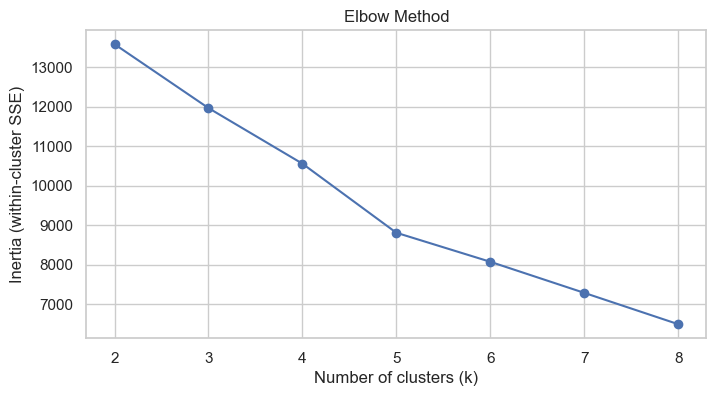

In [67]:
inertias = []
sil_scores = []

K_range = range(2, 9)  # try between 2 and 8 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(list(K_range), inertias, marker='o')
ax1.set_xlabel("Number of clusters (k)")
ax1.set_ylabel("Inertia (within-cluster SSE)")
ax1.set_title("Elbow Method")

In [69]:
plt.show()

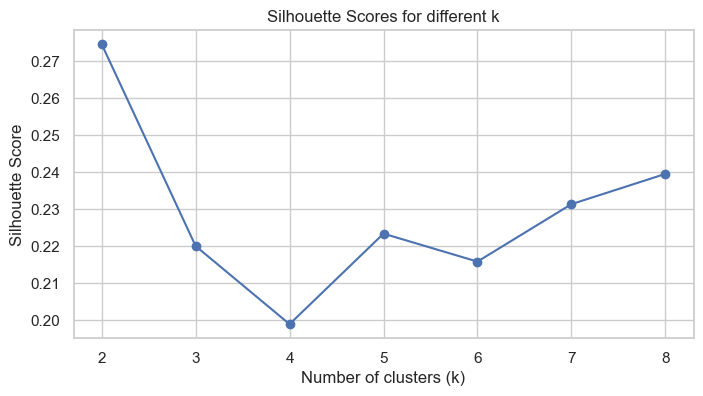

In [71]:
plt.figure(figsize=(8,4))
plt.plot(list(K_range), sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for different k")
plt.show()

In [73]:
list(zip(K_range, sil_scores))

[(2, 0.27452348064118925),
 (3, 0.2200172963329658),
 (4, 0.1989201844407569),
 (5, 0.22336263441894844),
 (6, 0.2158168970588704),
 (7, 0.2313183217130014),
 (8, 0.23949115618154956)]

In [75]:
best_k = 4  # adjust after seeing elbow/silhouette

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
cust_agg['segment'] = kmeans_final.fit_predict(X_scaled)

cust_agg.head()

,Customer ID,total_spend,avg_order_value,num_transactions,previous_purchases,freq_per_month,avg_review_rating,discount_rate,promo_rate,segment
0,1,53,53.0,1,14,2.00,3.1,1.0,1.0,3
1,2,64,64.0,1,2,2.00,3.1,1.0,1.0,2
2,3,73,73.0,1,23,4.00,3.1,1.0,1.0,2
3,4,90,90.0,1,49,4.00,3.5,1.0,1.0,2
4,5,49,49.0,1,31,0.08,2.7,1.0,1.0,1


In [77]:
# Segment profile (median values per segment)
segment_profile = cust_agg.groupby('segment')[feature_cols].median()
segment_profile

,total_spend,avg_order_value,num_transactions,previous_purchases,freq_per_month,avg_review_rating
segment,,,,,,
0,81.0,81.0,1.0,27.0,0.33,4.4
1,39.0,39.0,1.0,39.0,0.33,3.7
2,80.0,80.0,1.0,23.0,0.33,3.1
3,38.0,38.0,1.0,13.0,0.33,3.7


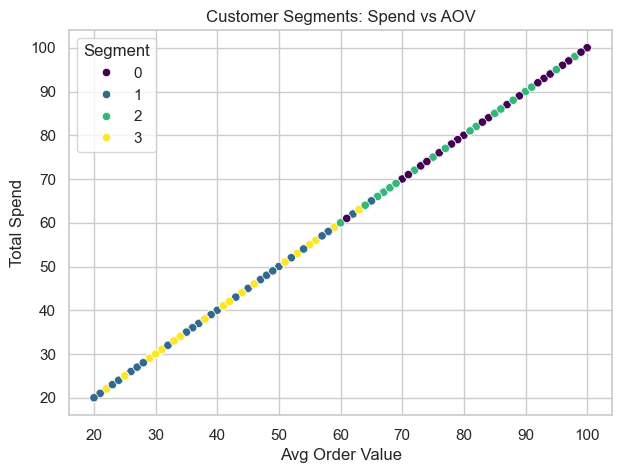

In [81]:
# Visualize segments: total_spend vs avg_order_value
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=cust_agg,
    x='avg_order_value',
    y='total_spend',
    hue='segment',
    palette='viridis'
)
plt.title("Customer Segments: Spend vs AOV")
plt.xlabel("Avg Order Value")
plt.ylabel("Total Spend")
plt.legend(title='Segment')
plt.show()

In [83]:
df = df.merge(cust_agg[['Customer ID', 'segment']], on='Customer ID', how='left')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,DiscountFlag,PromoFlag,IsRepeat,FreqPerMonth,segment
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,1,1,1,2.00,3
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,1,1,1,2.00,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1,1,1,4.00,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,1,1,1,4.00,2
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,1,1,1,0.08,1


In [85]:
transactions = df.groupby('Customer ID')['Item Purchased'].apply(list).tolist()

len(transactions), transactions[:3]

(3900, [['Blouse'], ['Sweater'], ['Jeans']])

In [87]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
trans_df = pd.DataFrame(te_ary, columns=te.columns_)

In [89]:
trans_df.head()

,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,Jacket,Jeans,Jewelry,Pants,Sandals,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
# Frequent itemsets (tune min_support based on dataset)
freq_items = apriori(trans_df, min_support=0.02, use_colnames=True)
freq_items = freq_items.sort_values('support', ascending=False)

freq_items.head(10)

,support,itemsets
12,0.043846,(Jewelry)
2,0.043846,(Blouse)
13,0.043846,(Pants)
16,0.043333,(Shirt)
5,0.042564,(Dress)
23,0.042051,(Sweater)
10,0.041795,(Jacket)
4,0.041282,(Coat)
22,0.041282,(Sunglasses)
1,0.041282,(Belt)


In [93]:
rules = association_rules(freq_items, metric="lift", min_threshold=1.1)

# Sort by lift (strongest associations)
rules = rules.sort_values('lift', ascending=False)

rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [95]:
# %%
def format_itemset(itemset):
    return ", ".join(sorted(list(itemset)))

rules_display = rules.copy()
rules_display['antecedents_str'] = rules_display['antecedents'].apply(format_itemset)
rules_display['consequents_str'] = rules_display['consequents'].apply(format_itemset)

rules_display[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']].head(15)


,antecedents_str,consequents_str,support,confidence,lift


In [97]:
df.to_csv("cleaned_transactions.csv", index=False)
cust_agg.to_csv("customer_segments.csv", index=False)

rules_out = rules_display[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']]
rules_out.to_csv("product_association_rules.csv", index=False)

print("Exported:")
print("- cleaned_transactions.csv")
print("- customer_segments.csv")
print("- product_association_rules.csv")

Exported:
- cleaned_transactions.csv
- customer_segments.csv
- product_association_rules.csv


In [109]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [114]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'discountflag', 'promoflag',
       'isrepeat', 'freqpermonth', 'segment'],
      dtype='object')

In [120]:
df.to_csv("edited_telco.csv", index=False)

In [124]:
labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels = labels)

In [127]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-aged


In [130]:
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [133]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


In [136]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [138]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"      # default user
password = "230479" # the password you set during installation
host = "localhost"         # if running locally
port = "5432"              # default PostgreSQL port
database = "cust_behave3"    # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = "telco_customers3"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'telco_customers3' in database 'cust_behave3'.
